In [17]:
library(tidyverse)
library(clusterProfiler)
library(BiocParallel)
library(parallel)
library(org.Hs.eg.db)
library(AnnotationDbi)
library(stats4)
library(BiocGenerics)

# Custom package
library(rutils)

In [18]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("CESC", "UCS", "UCEC")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")

In [19]:
dset_idx <- 3

In [20]:
fig_h <- 6
fig_w <- 8

In [21]:
deg_all_pathway_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_DEG_all_pathway.tsv"))
deg_m_pathway_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_DEG_matrisome_pathway.tsv"))
deg_all_gs_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_DEG_all_gene_set.tsv"))
deg_m_gs_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_DEG_matrisome_gene_set.tsv"))
figo_pathway_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_pathway.tsv"))
figo_gs_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_gene_set.tsv"))


-- Column specification -------------------------------------------------------------------------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character(),
  count = col_double(),
  ratio = col_double(),
  qval = col_double()
)



-- Column specification -------------------------------------------------------------------------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character(),
  count = col_double(),
  ratio = col_double(),
  qval = col_double()
)



-- Column specification -------------------------------------------------------------------------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character(),
  count = col_double(),
  ratio = col_double(),
  qval = col_double(),
  ont = col_character()
)



--

In [22]:
ea_plot <- function(df, title = "", top = 40, label_size = 16, qval_thresh = 0.05) {
    df <- df %>%
        dplyr::filter(qval < qval_thresh) %>%
        dplyr::top_n(n = -top, wt = qval) %>%
        dplyr::arrange(-log10(qval)) %>%
        dplyr::mutate(type_fact = factor(type, levels = type))
    ggplot(df) +
        geom_bar(aes(x = type_fact, y = -log10(qval)), stat = "identity") +
        theme_classic() +
        theme(
            axis.title.y = element_blank(),
            axis.title.x = element_text(size = label_size),
            plot.title = element_text(face = "bold", size = label_size)
        ) +
        labs(title = title, y = expression("-log"[10]*"(q-value)")) +
        coord_flip()
}


# DEG enrichment

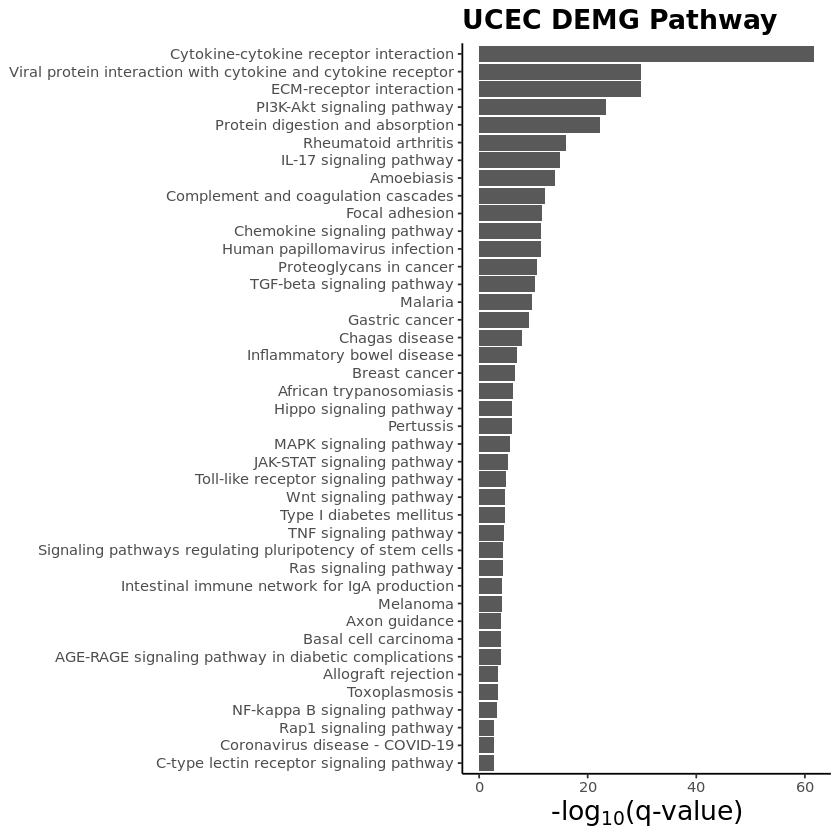

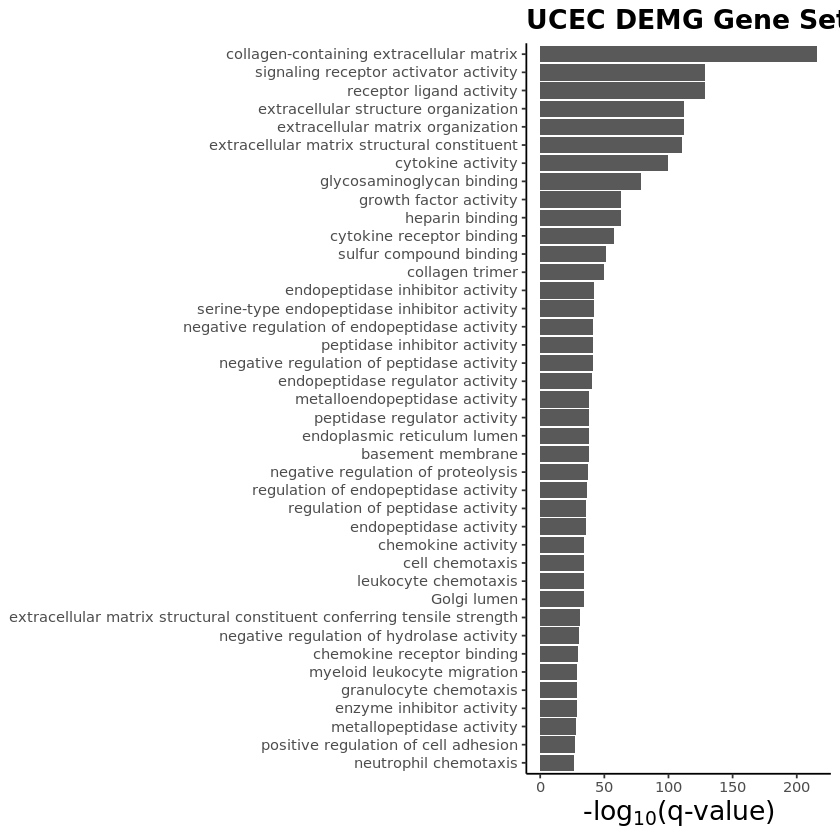

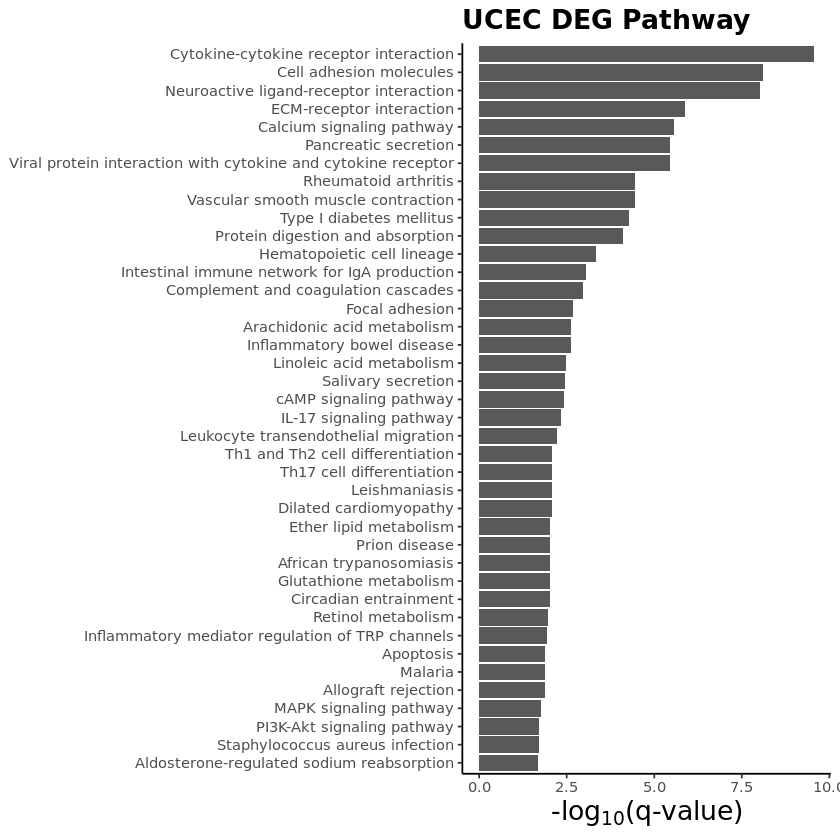

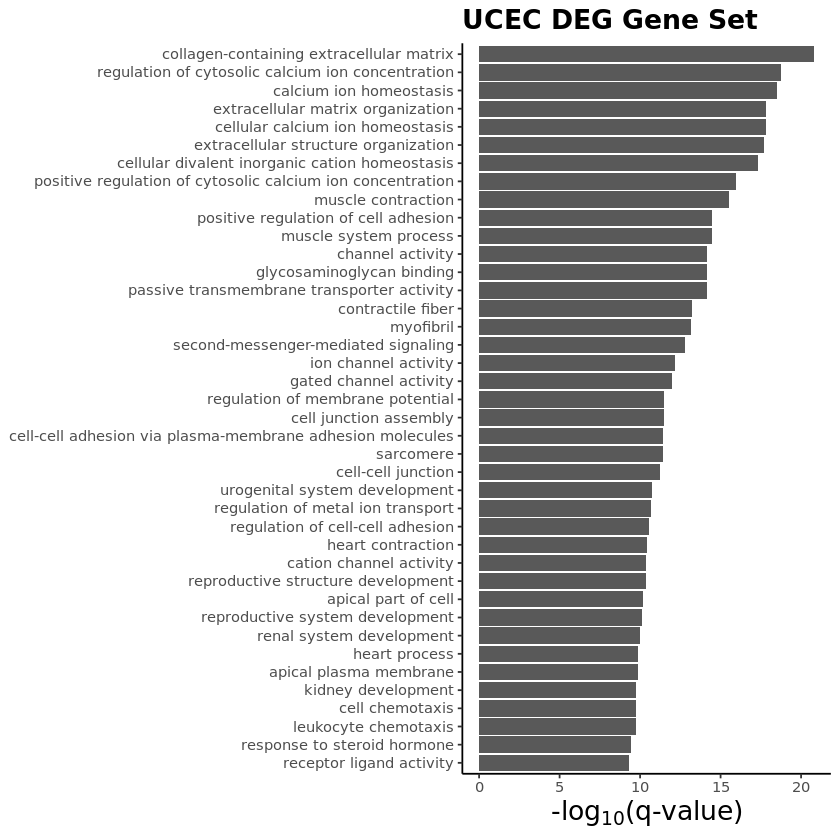

In [23]:
ea_plot(deg_m_pathway_df, title = paste0(projects[dset_idx], " DEMG Pathway"), top = 40)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_DEG_matrisome_pathway.png"), last_plot(), height = fig_h, width = fig_w)
ea_plot(deg_m_gs_df, title = paste0(projects[dset_idx], " DEMG Gene Set"), top = 40)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_DEG_matrisome_gene_set.png"), last_plot(), height = fig_h, width = fig_w)
ea_plot(deg_all_pathway_df, title = paste0(projects[dset_idx], " DEG Pathway"), top = 40)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_DEG_all_pathway.png"), last_plot(), height = fig_h, width = fig_w)
ea_plot(deg_all_gs_df, title = paste0(projects[dset_idx], " DEG Gene Set"), top = 40)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_DEG_all_gene_set.png"), last_plot(), height = fig_h, width = fig_w)

# FIGO enrichment

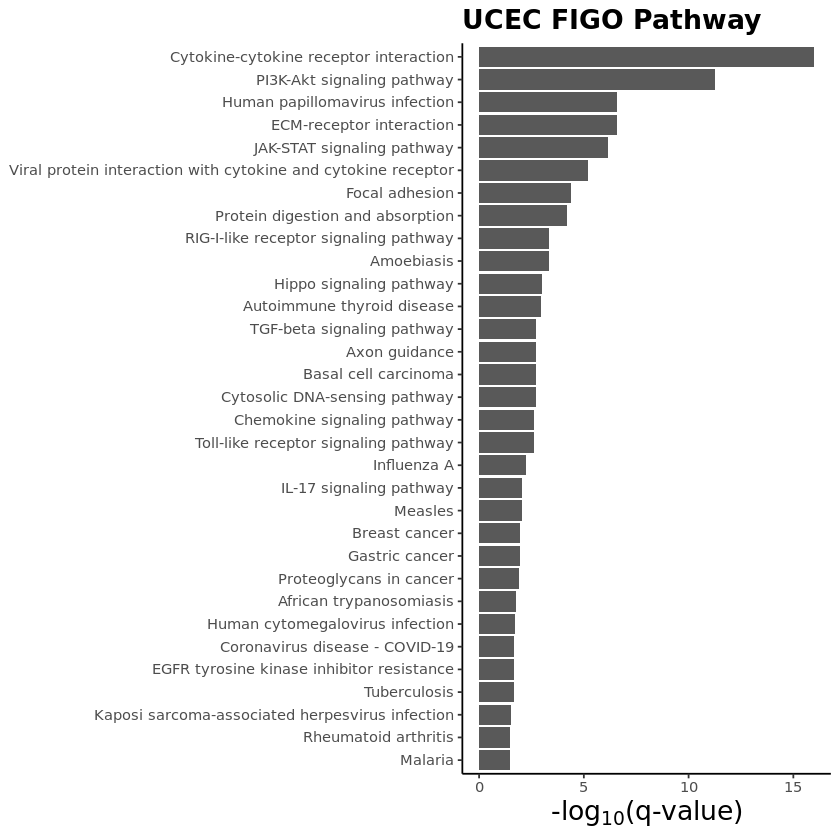

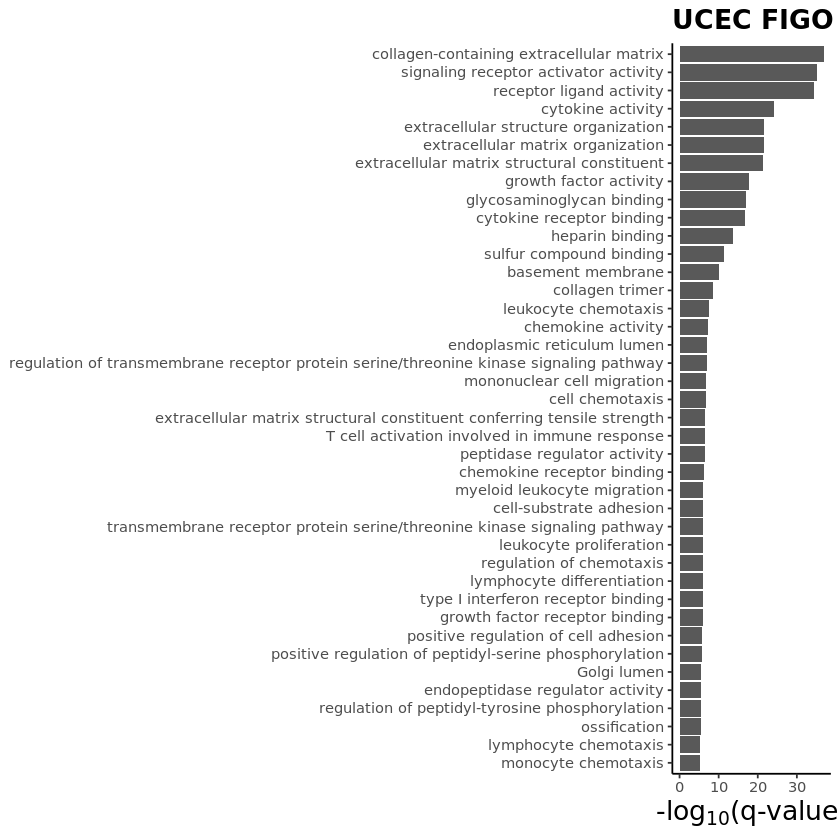

In [24]:
ea_plot(figo_pathway_df, title = paste0(projects[dset_idx], " FIGO Pathway"), top = 40)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_pathway.png"), last_plot(), height = fig_h, width = fig_w)
ea_plot(figo_gs_df, title = paste0(projects[dset_idx], " FIGO Gene Set"), top = 40)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_gene_set.png"), last_plot(), height = fig_h, width = fig_w)